<a href="https://colab.research.google.com/github/reo113/pythonprojects-microcred2022/blob/main/COVID19_DATA_ANALYSIS_CLASS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

:Import all required libraries that are needed for data analysis

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
37689,2022-01-14,Virginia,51,1351417,15803
37690,2022-01-14,Washington,53,1046294,10286
37691,2022-01-14,West Virginia,54,377735,5516
37692,2022-01-14,Wisconsin,55,1297618,11649


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [34]:
ny_df = df[df['state']=='New York']

In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

In [57]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [59]:
newcase_count

47352

In [ ]:
#drop the null cases
ny_df_noNan = ny_df.dropna(axis=1,how="any")
ny_df_noNan.head(11)

# Task4: Understand NY covid 19 data in last 30 days

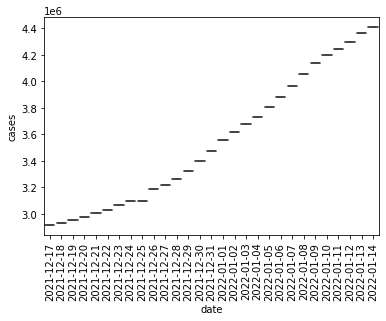

In [61]:
ny_state_30= ny_df.sort_values('date', ascending = True).tail(29) # sort by last 30
plt.xticks(rotation=90)
sns.boxplot(data=ny_state_30, x = "date", y="cases")

In [ ]:
plt.figure(figsize=(10,5))
state_by_deaths=ny_state_30.groupby(["date"])["deaths"].count().sort_values(ascending=True).plot(kind="bar")

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plot = sns.scatterplot(data=ny_state_30, x="deaths", y="cases", palette="Reds" )

# Comparing Covid 19 data with different states

In [7]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

In [ ]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
plt.xticks(rotation=90)
plt.legend(states)
plt.show()

# Conclusion

Below are the conclusions:



1.   Conclusion 1
    we were able to create a for loop in the data to sum up the total new cases in new york state.

    we were also able to put that in chart form and see how with each new day the caes went up
2.   Conclusion 2
     We were able to compare 5 differetn state using a for loop to cycle thru a specific amount of time and see how there case number compare

